# Dependencies

In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from time import strptime
from scipy import stats

# Load File

In [ ]:
file = "monthly_data.csv"

# Read File with Pandas and Understand data

In [ ]:
data = pd.read_csv(file)
data.head()

In [4]:
data.shape

In [5]:
data.dtypes

# Extracting Month Names

In [11]:
data['month_year'] = pd.to_datetime(data['Date of Contact']).dt.to_period('M')

data['month'] = pd.DatetimeIndex(data['Date of Contact']).month_name().str.slice(stop=3)

data['year'] = pd.DatetimeIndex(data['Date of Contact']).year
data.head()

,Account manager,Client Name,Date of Contact,month_year,month,year
0,Milan Crona,"Wyman, Farrell and Haag",2015-10-31,2015-10,Oct,2015
1,Aidan Pouros,"Veum, McClure and Schuster",2013-12-15,2013-12,Dec,2013
2,Aidan Pouros,"Veum, McClure and Schuster",2013-12-07,2013-12,Dec,2013
3,Milan Crona,Armstrong Group,2013-11-02,2013-11,Nov,2013
4,Aidan Pouros,"Lueilwitz, Moore and Hahn",2013-12-25,2013-12,Dec,2013


# What is the number of unique Client-specific contacts per month? 
# First, lets count the number of clients

In [12]:
data["Client Name"].nunique()

35

In [27]:
# Lets count the number of clients who were contacted, and sorted by aggregate months

unique_client_contacts = data.groupby('month')['Client Name'].nunique().sort_values(ascending=False).reset_index(name='Client Name')
unique_client_contacts

,month,Client Name
0,Oct,35
1,Jun,34
2,Sep,33
3,May,33
4,Aug,33
5,Dec,32
6,Feb,31
7,Nov,30
8,Jan,30
9,Mar,29


# Of the 35 clients, 100% were contacted in October. June was the next most popular month

# Are 100% of clients contacted in October every year?

In [28]:
# Lets count the number of clients who were contacted each month, sorted by year

unique_months = data.groupby('month_year')['Client Name'].nunique().sort_values(ascending=False).reset_index(name='Client Name')
unique_months

,month_year,Client Name
0,2013-10,31
1,2014-10,28
2,2015-10,28
3,2016-10,25
4,2014-09,23
5,2017-09,21
6,2014-06,19
7,2016-09,19
8,2015-09,18
9,2016-12,17


# No, not all clients are contacted each October, but October is the month every year when the highest percentage of clients are contacted

# Lets Illustrate the number of unique contacts by month

In [42]:
unique_contacts = data.groupby("month")['Client Name'].nunique().sort_values(ascending=False)
# .reset_index(name='Client Name')
unique_contacts.head()

month
Oct    35
Jun    34
Sep    33
May    33
Aug    33
Name: Client Name, dtype: int64

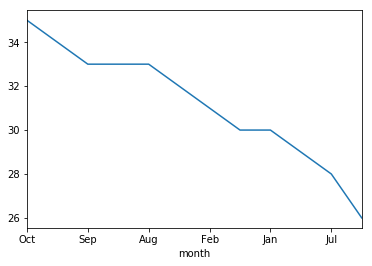

In [41]:
unique_contacts.plot()
plt.savefig("months.png")

# Lets Illustrate with a Time Series - Unique Contacts Month by Month

In [25]:
# Lets count the number of clients who were contacted each month, sorted by year

unique_months2 = data.groupby('month_year')['Client Name'].nunique()
# .sort_values(ascending=False).reset_index(name='Client Name')
unique_months2.head()

month_year
2013-10    31
2013-11    12
2013-12    15
2014-01     9
2014-02    11
Freq: M, Name: Client Name, dtype: int64

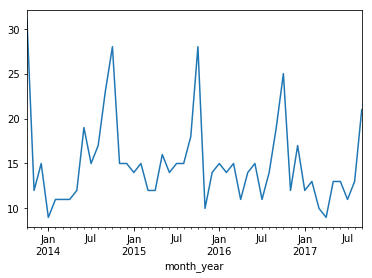

In [24]:
unique_months2.plot()
plt.savefig("unique_months2.png")

# October is the best month to launch
# But, the data shows that only in October of 2013 were all clients contacted. Since then there has there been a downward trend every October in the total percentage of clients contacted